# EDA On E-Commerce Data

Exploratory Data Analysis (EDA) involves summarizing the data, identifying patterns and trends, and highlighting potential areas for further investigation. In the context of this e-commerce dataset, EDA will help us understand characteristics like customer buying behavior, product performance, and sales trends across various countries. This initial exploration paves the way for deeper analysis and allows us to extract valuable insights to inform business decisions.

## 1. Libraries and Utilities

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and Check Data



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv',encoding = 'unicode_escape')
df=pd.DataFrame(data)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 3. Understanding Data



*   Feature Description:

  *   Invoice Number: Unique identifier (6 digits), "c" prefix indicates cancellation.
  * Stock Code: Unique product identifier (5 digits).
  * Description: Name of the product purchased.
  * Quantity: Number of units of each product sold in a transaction.
  * Invoice Date: Date and time of the transaction.
  * Unit Price: Price per unit of the product.
  * Customer ID: Unique identifier for each customer (5 digits).
  * Country: Customer's country of residence.






* Shape/Dimension:

In [ ]:
print('Rows: {}'.format(df.shape[0]))
print('Columns: {}'.format(df.shape[1]))

Rows: 541909
Columns: 8


* Datatype of each column:

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Observation: The datatype of CustomerID should inherently be int. However, here is it float.

* Missing values:

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isnull().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
df[df['Description'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/2010 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/2010 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom


In [ ]:
df[df['CustomerID'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


* Descriptive Statistics:

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.sort_values(by=['Quantity'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom


In [ ]:
df.sort_values(by=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1,1/11/2011 9:14,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000,1/11/2011 9:32,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom


# 4. Data Cleaning and Processing

* Removing rows with missing values:

In [ ]:
dnf = df.dropna()
dnf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


We can observe that all tuples with missing Descriptions also had missing CustomerID



*   Converting CustomerID to int:



In [ ]:
dnf['CustomerID'] = dnf['CustomerID'].astype('int64')

<ipython-input-89-8faf0db7b6fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnf['CustomerID'] = dnf['CustomerID'].astype('int64')




*   Removing negative values:



In [ ]:
dnf = dnf[dnf['Quantity'] > 0]
dnf = dnf[dnf['UnitPrice'] > 0]
dnf.shape

(397884, 8)

* Adding a new column 'Amount' for better insight:

In [ ]:
dnf['Amount'] = dnf['Quantity'] * dnf['UnitPrice']
dnf

<ipython-input-91-df4375132062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnf['Amount'] = dnf['Quantity'] * dnf['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


* Splitting InvoiceDate into Day, Month, Year, Hour

In [ ]:
dnf['InvoiceDate'] = pd.to_datetime(dnf['InvoiceDate'])
dnf["Day"] = dnf['InvoiceDate'].map(lambda x: x.day)
dnf["Month"] = dnf['InvoiceDate'].map(lambda x: x.month)
dnf["Year"] = dnf['InvoiceDate'].map(lambda x: x.year)
dnf["Hour"] = dnf['InvoiceDate'].map(lambda x: x.hour)
dnf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Day,Month,Year,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1,12,2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1,12,2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1,12,2010,8


# 5. EDA:

In [ ]:
dnf['StockCode'].nunique()

3665

In [ ]:
dnf.groupby('StockCode').size()

StockCode
10002       49
10080       21
10120       30
10123C       3
10124A       5
          ... 
C2         133
DOT         16
M          284
PADS         3
POST      1099
Length: 3665, dtype: int64

In [ ]:
dnf['CustomerID'].nunique()

4338

In [ ]:
dnf.groupby('Country')['CustomerID'].nunique()

Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   94
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     30
Sweden                     8
Switzerland               21
USA                        4
United

Top selling products

In [ ]:
top_products = dnf.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

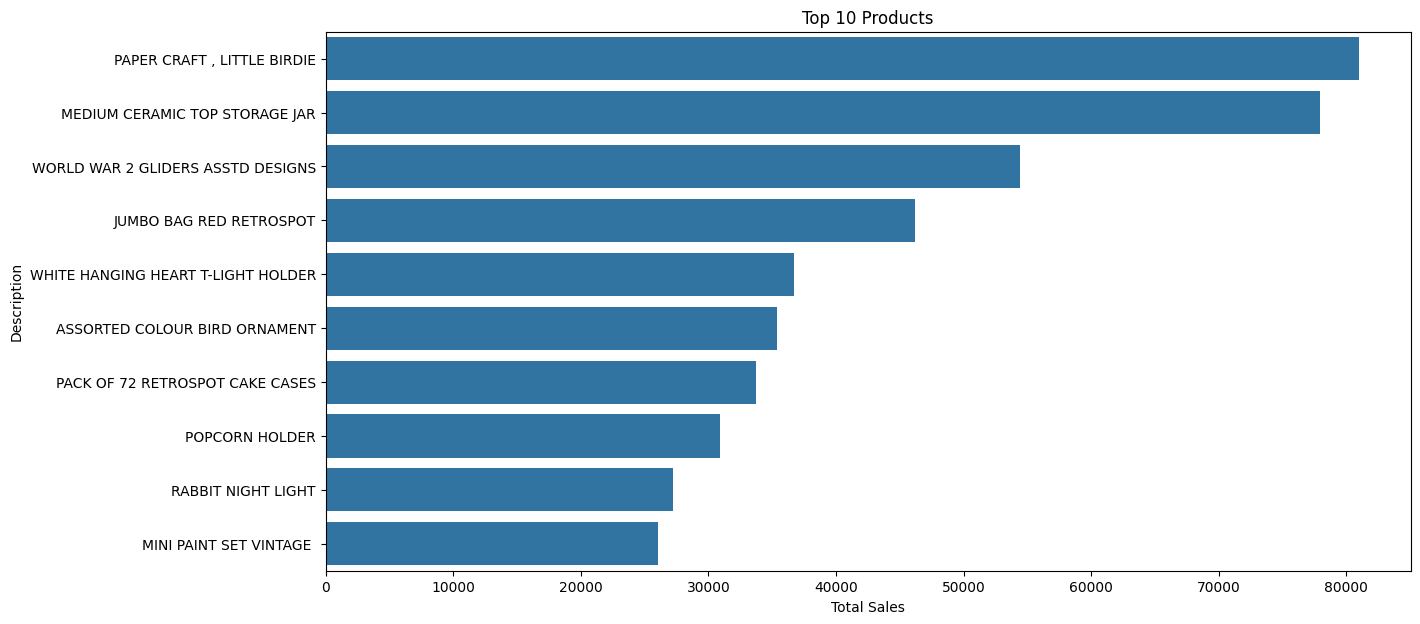

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products')
plt.xlabel('Total Sales')
plt.ylabel('Description')
plt.show()

The bar plot reveals the top 10 selling products. These are the most popular items and inventory management and marketing efforts should be prioritized for these products.

Customer Sales Analysis and Segmentation

In [ ]:
customer_sales = dnf.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)
customer_sales

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: Amount, Length: 4338, dtype: float64

In [ ]:
customer_sales.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Amount, dtype: float64

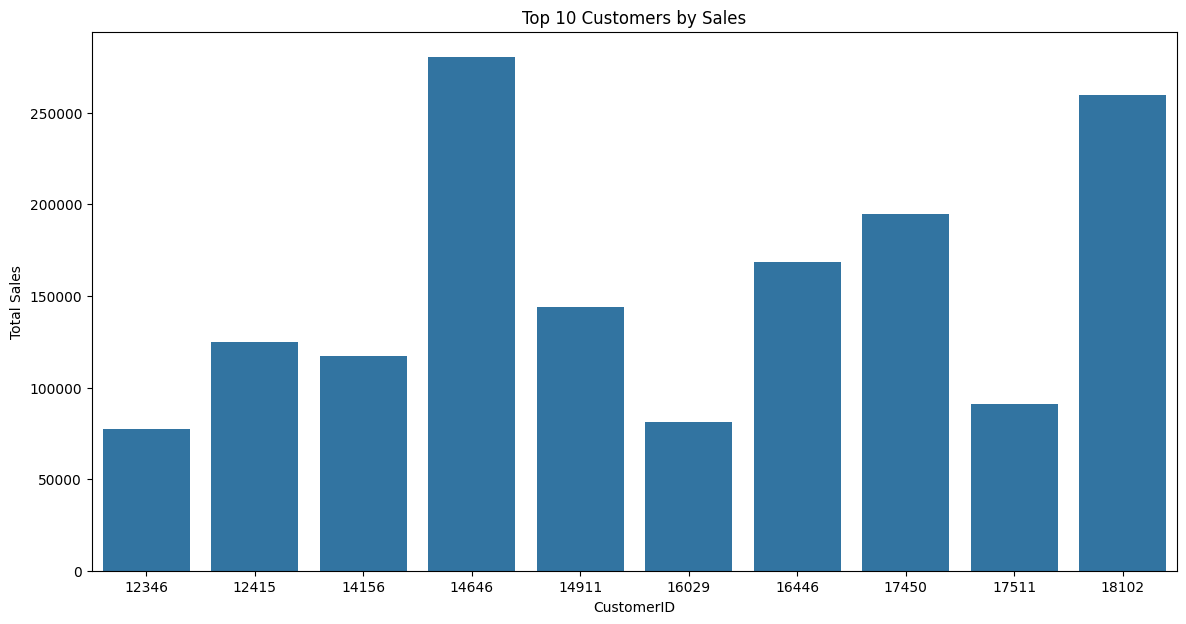

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=customer_sales.head(10).index, y=customer_sales.head(10).values)
plt.title('Top 10 Customers by Sales')
plt.ylabel('Total Sales')
plt.xlabel('CustomerID')
plt.show()

These top customers seems to be having extremely high number of sales compared to the mean of 2054 and median of just 674. This suggests that there are very different groups of customers with very different purchasing behaviour

In [ ]:
dnf.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

Sales by country

In [ ]:
country_sales = dnf.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10)
country_sales

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Amount, dtype: float64

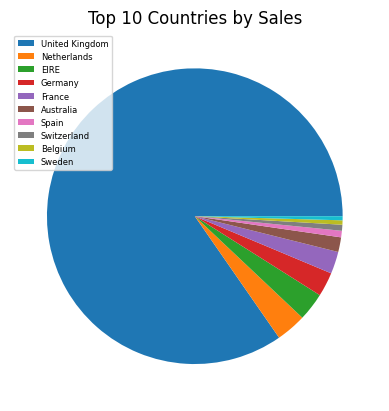

In [ ]:
plt.pie(country_sales.values)
plt.legend(country_sales.index,loc='upper left',fontsize=6)
plt.title('Top 10 Countries by Sales')
plt.show()

The pie plot displays the top 10 countries by sales. We can see that UK is clearly the lead, taking up most of the profit. This is not unexpected as this is a UK company. However, we can also see that Netherlands, Ireland, Germany, and France the top performing international markets for the business. It seems like most of the customers are in Europe

Checking Yearly Sales

In [ ]:
ym_sales = dnf.groupby(['Year','Month'])['Amount'].sum()
ym_sales

Year  Month
2010  12        572713.890
2011  1         569445.040
      2         447137.350
      3         595500.760
      4         469200.361
      5         678594.560
      6         661213.690
      7         600091.011
      8         645343.900
      9         952838.382
      10       1039318.790
      11       1161817.380
      12        518192.790
Name: Amount, dtype: float64

In [ ]:
m_sales = dnf[dnf['Year'] == 2011].groupby('Month')['Amount'].sum()
m_sales

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12     518192.790
Name: Amount, dtype: float64

Text(0, 0.5, 'Amount')

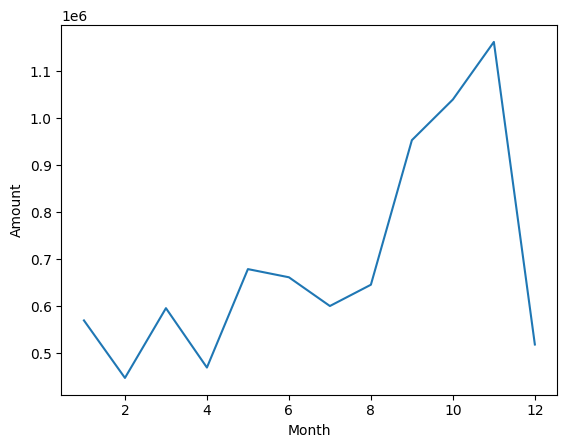

In [ ]:
sns.lineplot(x=m_sales.index, y=m_sales.values)
plt.ylabel('Amount')

Sales of products by Country and Quantity

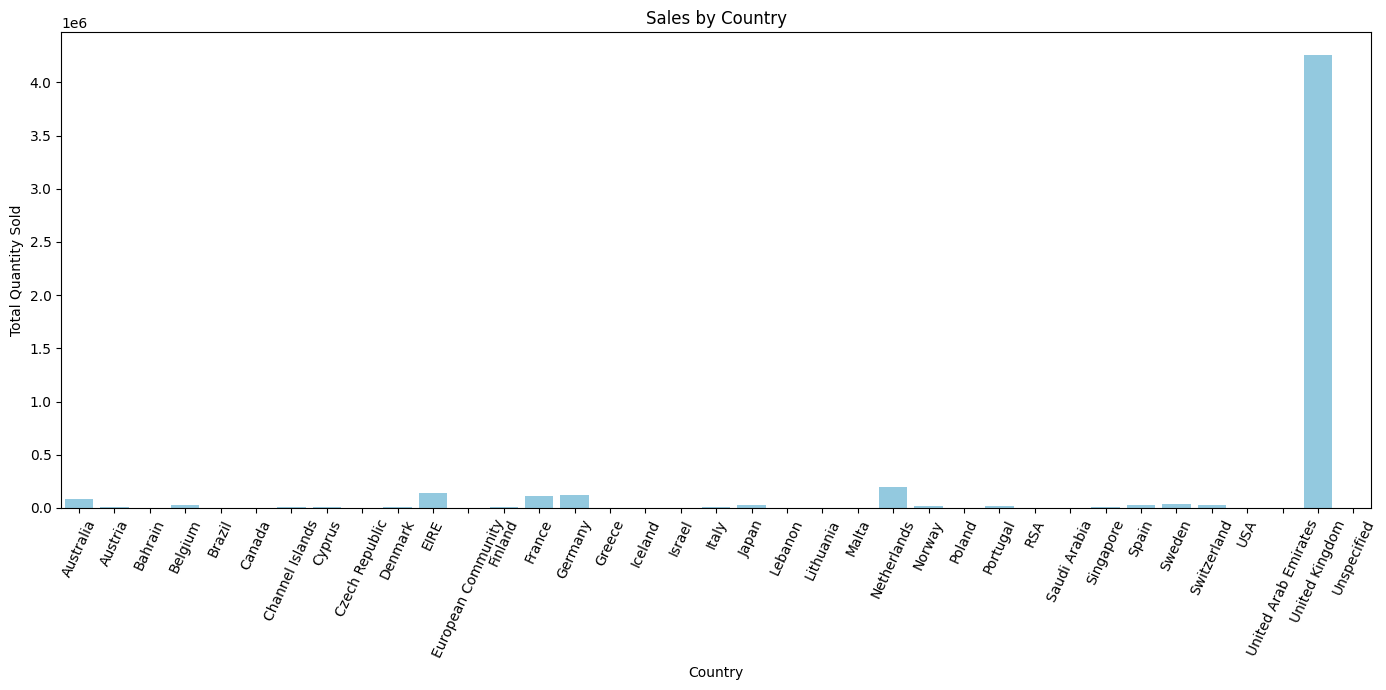

In [ ]:
cq_sales = dnf.groupby('Country')['Quantity'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x="Country", y="Quantity", data=cq_sales, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Sales by Country')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

This barplot clearly states that dominating the sales landscape is the UK, boasting the highest quantity sold. Following closely behind are the Netherlands and then France, and Germany, each demonstrating comparable sales figures. These European nations exhibit a tight race for second place, with only slight variations in their sales performance.

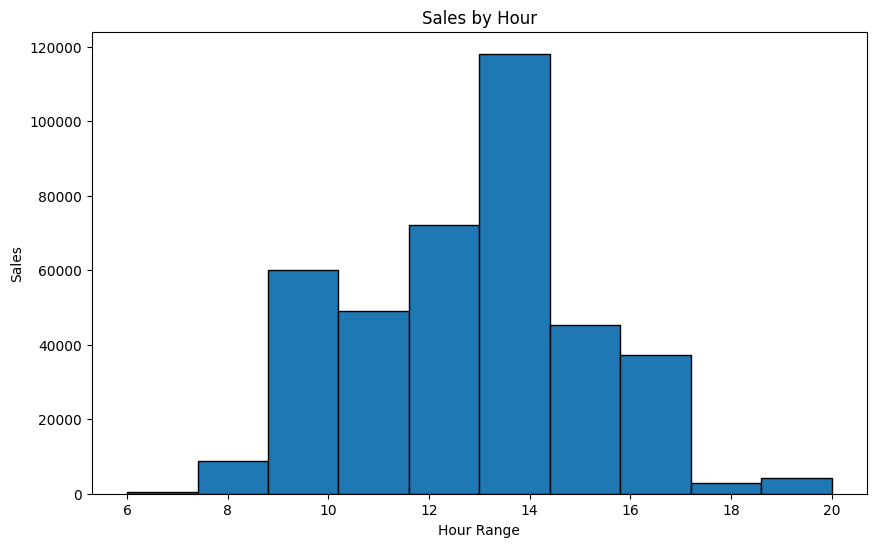

In [ ]:
plt.figure(figsize=(10, 6))
x=dnf['Hour']
plt.hist(x,edgecolor='black')
plt.xlabel('Hour Range')
plt.ylabel('Sales')
plt.title('Sales by Hour')
plt.show()